## Obesity Level Prediction – Introduction
* Obesity is a complex condition resulting from the interaction between eating habits, physical activity, and other lifestyle factors.
* This project seeks to build a predictive model of obesity levels in individuals based on their eating habits and physical condition, using models such as logistic regression and SVM.

## Path dir 

In [29]:
import os
import sys
PATH = os.getcwd()
DIR_DATA = PATH + '{0}data{0}'.format(os.sep)
sys.path.append(PATH) if PATH not in list(sys.path) else None
DIR_DATA

'c:\\Users\\usuario\\Documents\\AI_models\\data\\'

## Libraries 


In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report


from pycaret.classification import *

# ML Al
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold, ShuffleSplit
from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix

In [31]:
# File name
filename = DIR_DATA + 'ObesityDataSet.csv'
filename

'c:\\Users\\usuario\\Documents\\AI_models\\data\\ObesityDataSet.csv'

## Data content

The dataset contains information about individuals' physical condition and lifestyle habits, intended to predict their obesity level. Each row represents a person, described through a combination of numerical and categorical features. The target variable is `NObeyesdad`, which classifies the individual into one of several obesity categories (e.g., Normal Weight, Overweight, Obesity Type I, etc.).

Below is a description of the features:

- **Gender**: Gender of the individual (`Male` or `Female`).
- **Age**: Age of the person (numeric, in years).
- **Height**: Height of the person in meters.
- **Weight**: Weight of the person in kilograms.
- **family_history_with_overweight**: Whether the person has a family history of overweight (`yes` or `no`).
- **FAVC**: Frequent consumption of high-caloric food (`yes` or `no`).
- **FCVC**: Frequency of consumption of vegetables (numeric scale, typically 1–3).
- **NCP**: Number of main meals per day (numeric).
- **CAEC**: Consumption of food between meals (`no`, `Sometimes`, `Frequently`, `Always`).
- **SMOKE**: Whether the person smokes (`yes` or `no`).
- **CH2O**: Daily water intake (liters per day, typically between 1–3).
- **SCC**: Whether the person monitors their calorie consumption (`yes` or `no`).
- **FAF**: Frequency of physical activity (hours per week).
- **TUE**: Time spent using technology devices (hours per day).
- **CALC**: Frequency of alcohol consumption (`no`, `Sometimes`, `Frequently`, `Always`).
- **MTRANS**: Main mode of transportation (`Walking`, `Bike`, `Motorbike`, `Public_Transportation`, `Automobile`).

- **NObeyesdad (Target)**: Obesity level of the person, with categories including:
  - Insufficient_Weight
  - Normal_Weight
  - Overweight_Level_I
  - Overweight_Level_II
  - Obesity_Type_I
  - Obesity_Type_II
  - Obesity_Type_III

Understanding these features helps in selecting proper preprocessing techniques (e.g., encoding categorical variables, scaling numerical features) and ensures meaningful training of classification models. Some features may need to be normalized or transformed, and class imbalance should be addressed before model training.


## Read and analyse data 

In [32]:
df = pd.read_csv(filename)

In [33]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [34]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## Preprocessing: Missing Value Problem

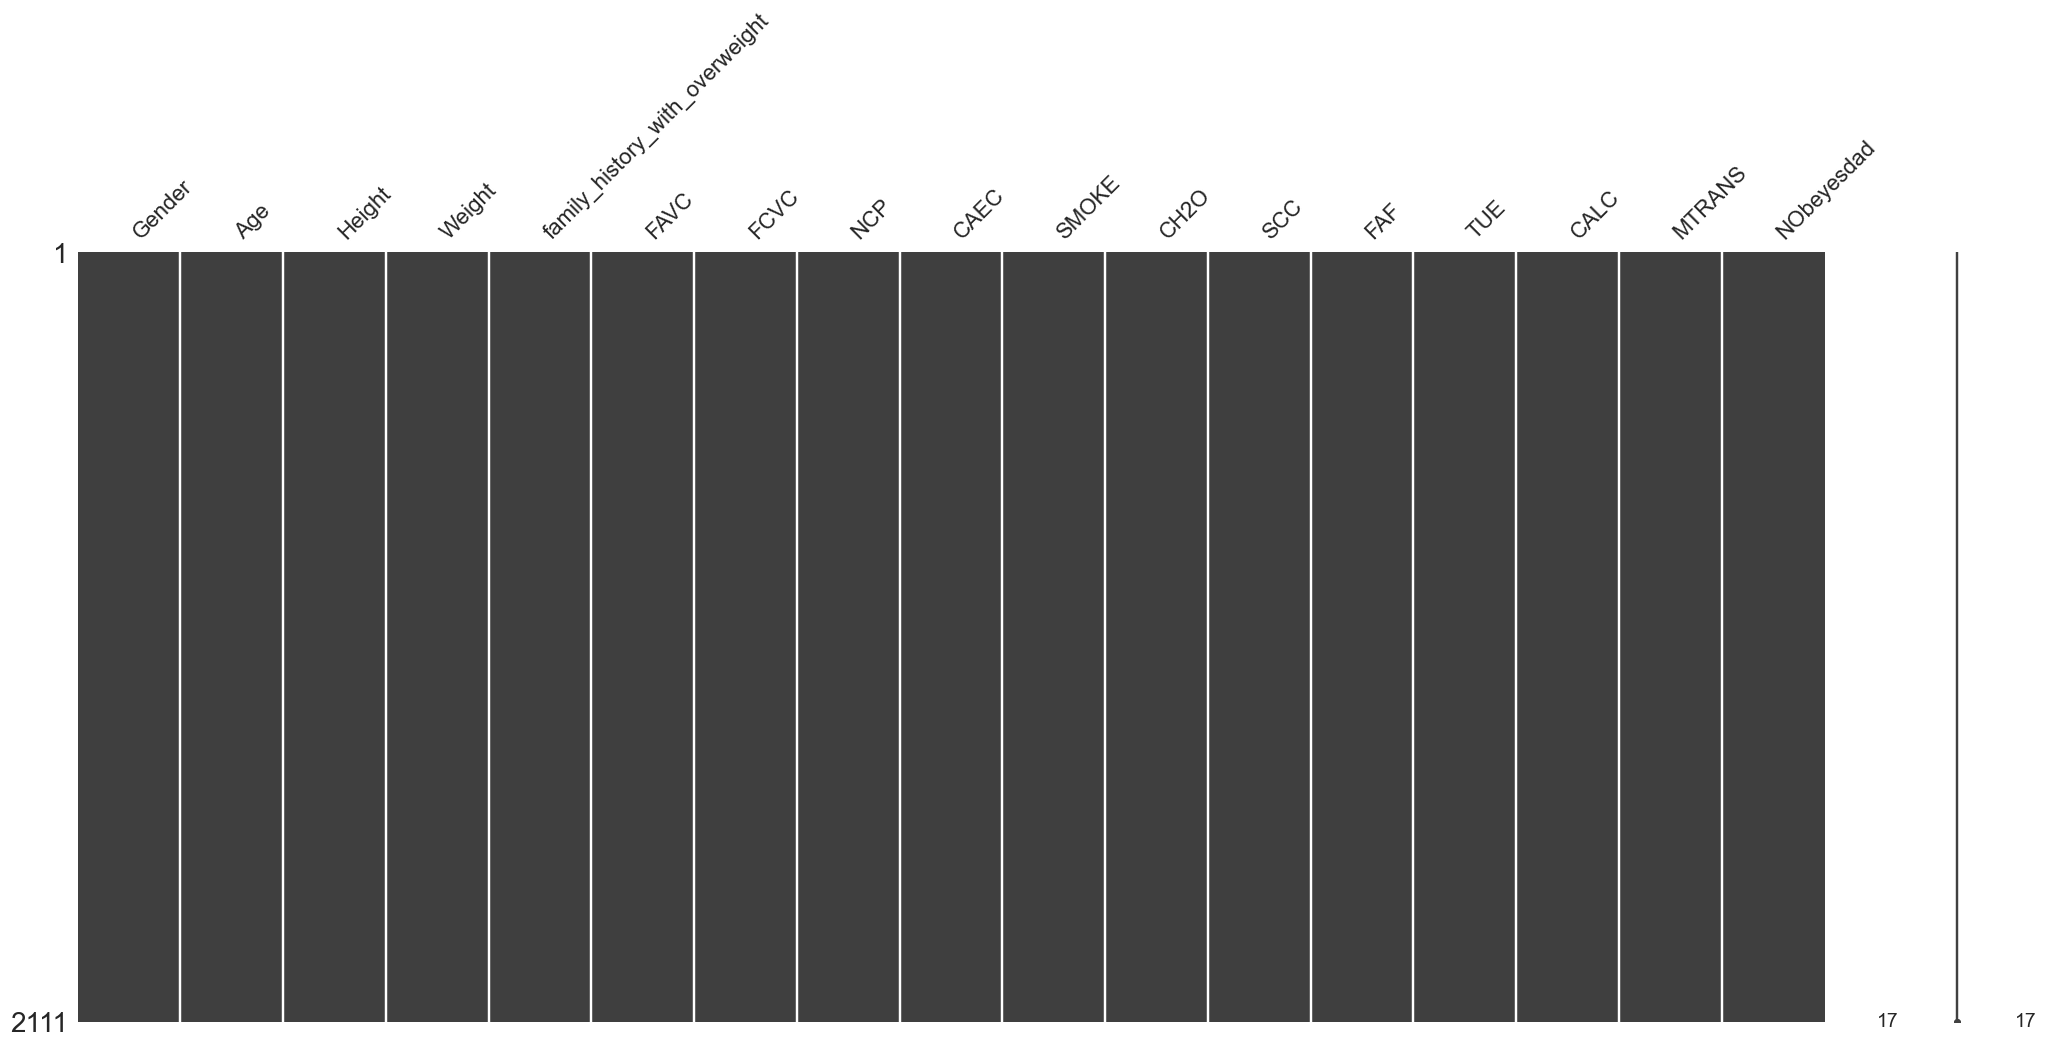

In [36]:
# We will check if there are missin values in our dataset
msno.matrix(df)
plt.show()

## Dependent Variable Analaysis

In [37]:
# As we can see there are no null values inside our dataset, however,
# to clarify that we can apply the isnull() method to see it clearly
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

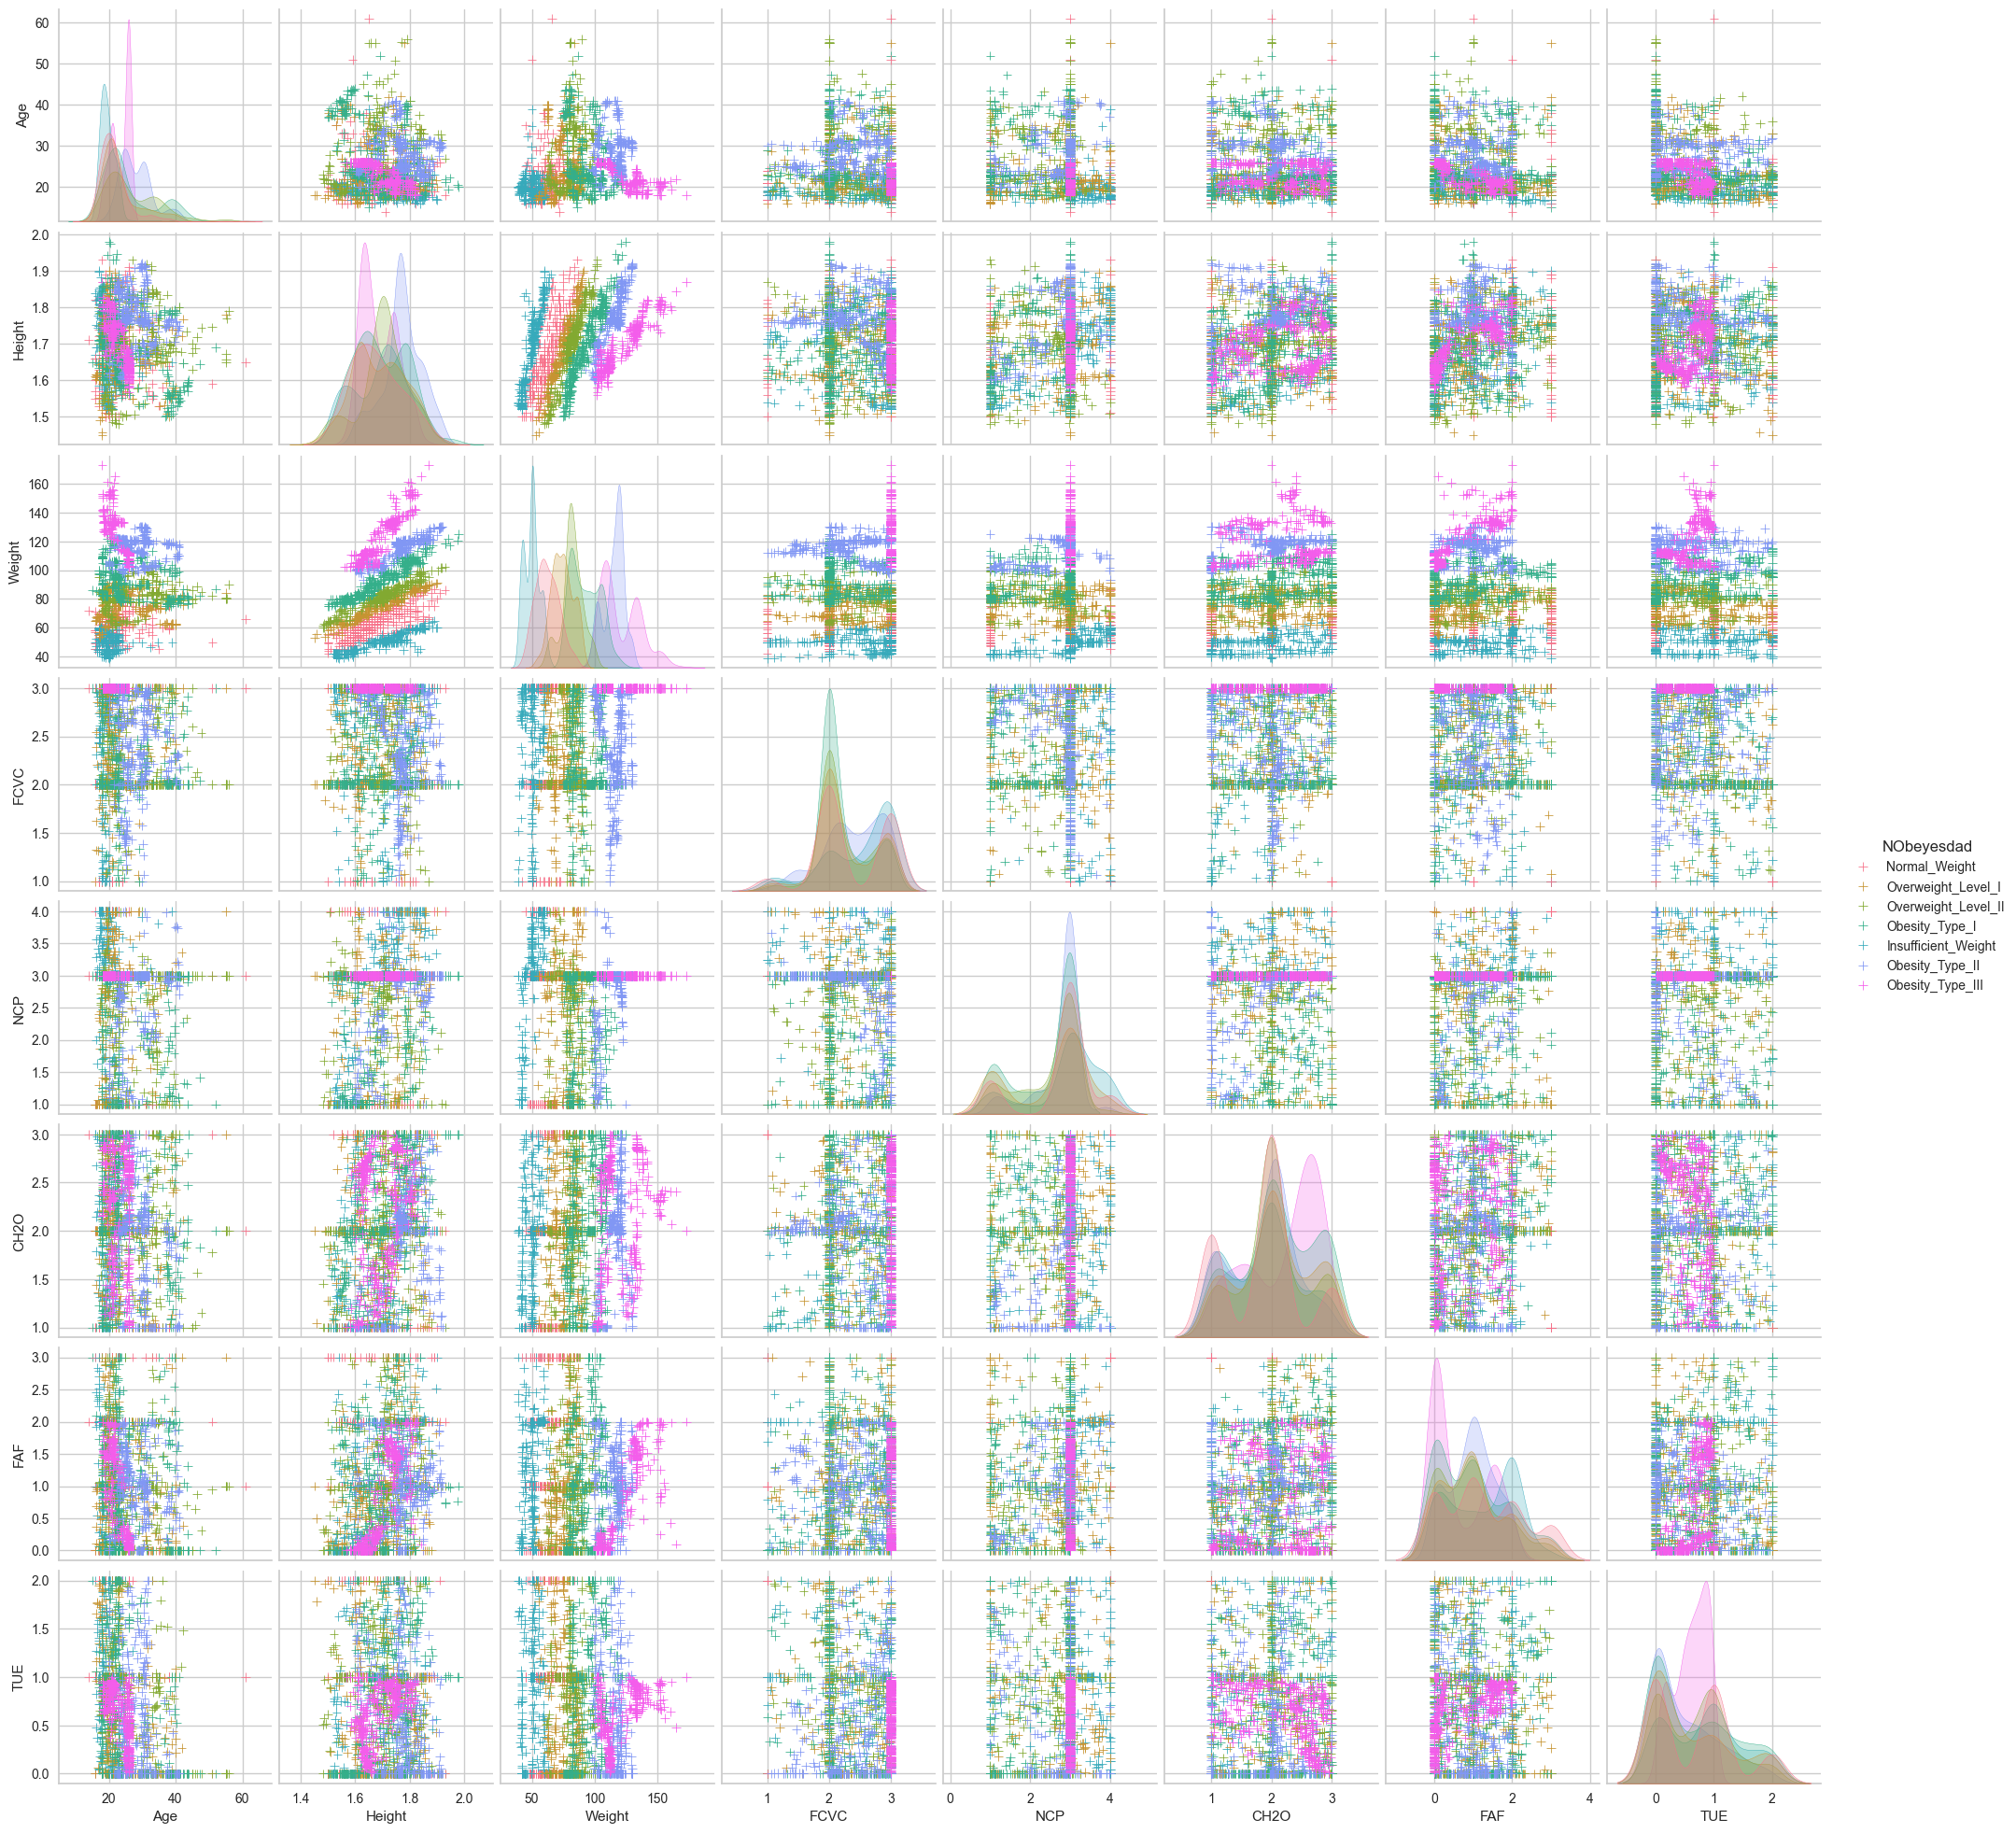

In [38]:
g = sns.pairplot(df, hue='NObeyesdad', markers='+')
plt.show()

## Correlation between features

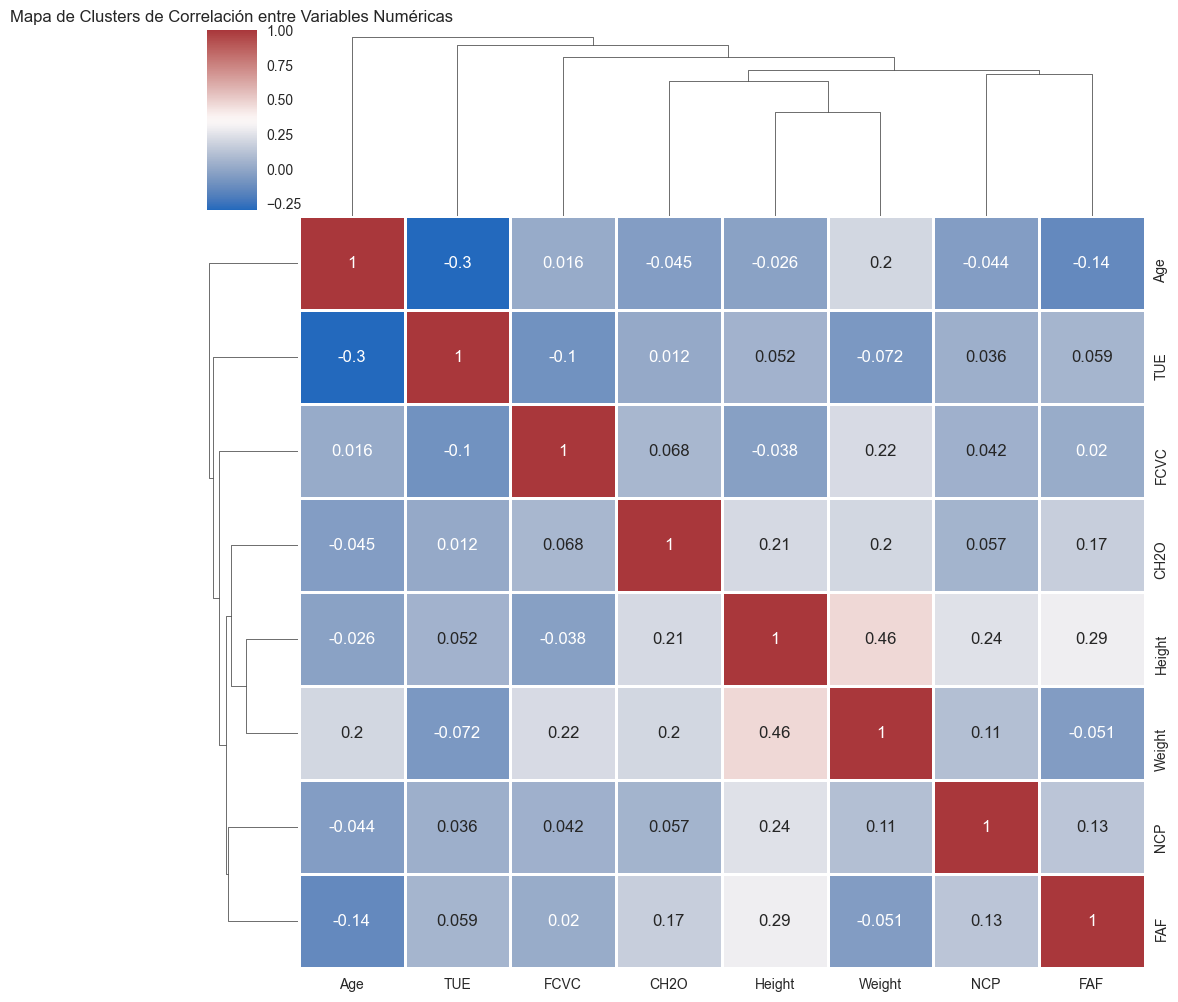

In [39]:
# Selecting just the numeric type columns from the dataset
df_numeric = df.select_dtypes(include='number')

# Calculating the correlation matrix with numeric values
corr = df_numeric.corr()

# Drawing the clustermap
sns.clustermap(corr, cmap="vlag", annot=True, dendrogram_ratio=(0.1, 0.2), linewidths=0.8)
plt.title("Mapa de Clusters de Correlación entre Variables Numéricas")
plt.show()

## Numeric features distribution

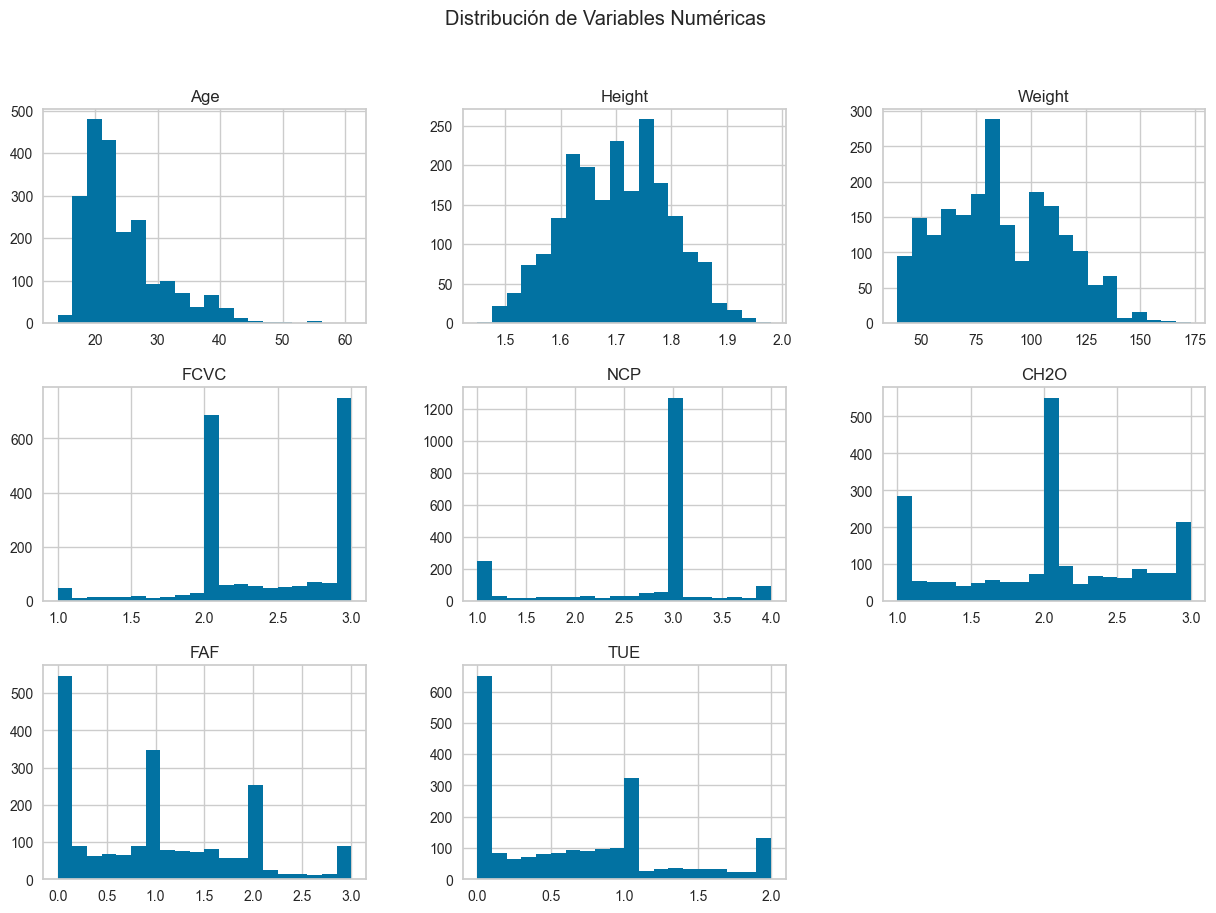

In [40]:
# Histograms for numeric values
df_numeric.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribución de Variables Numéricas")
plt.show()

## Distribution for categorical features 

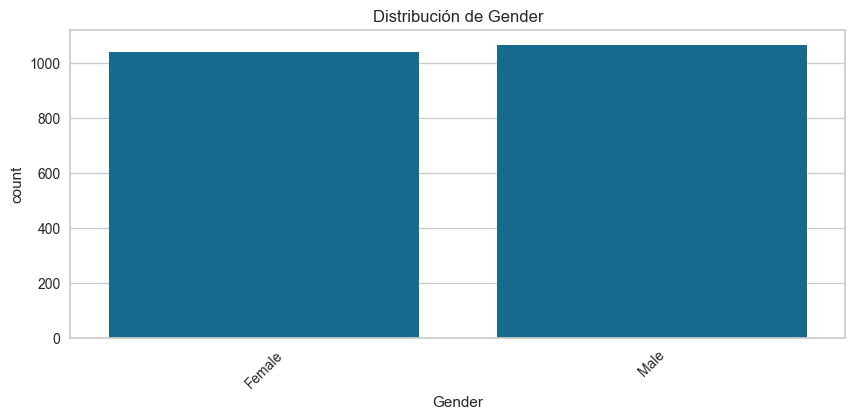

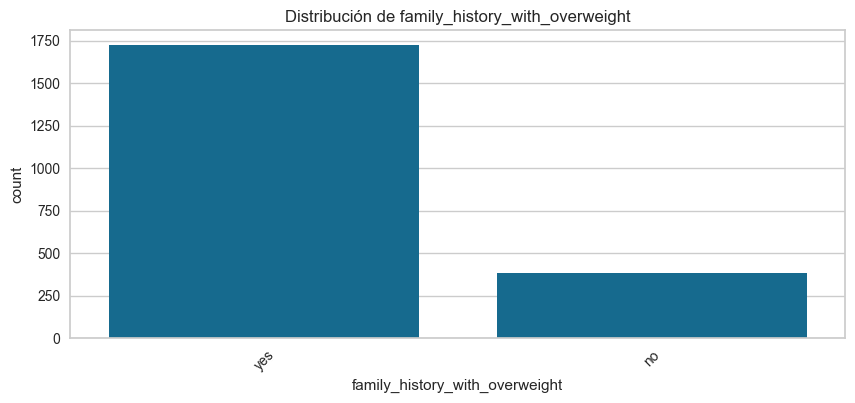

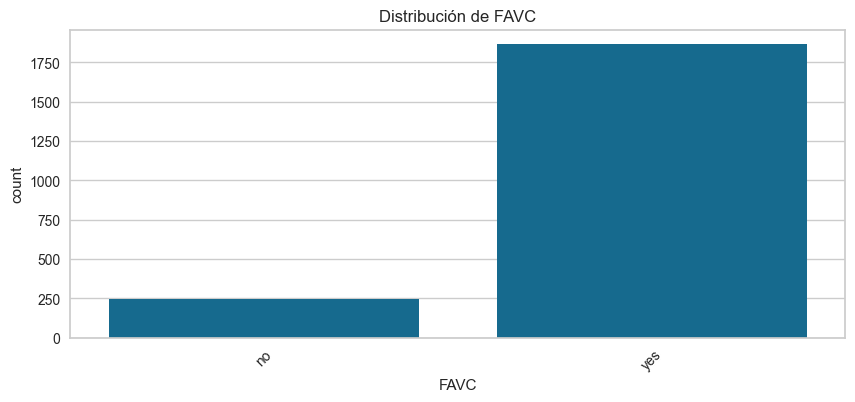

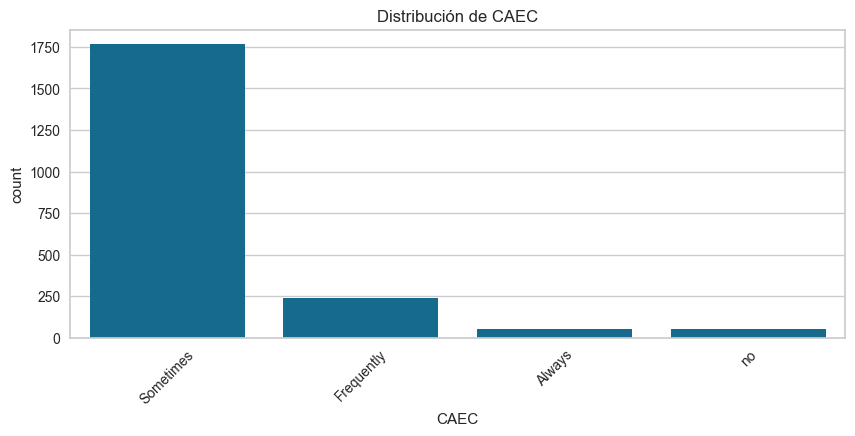

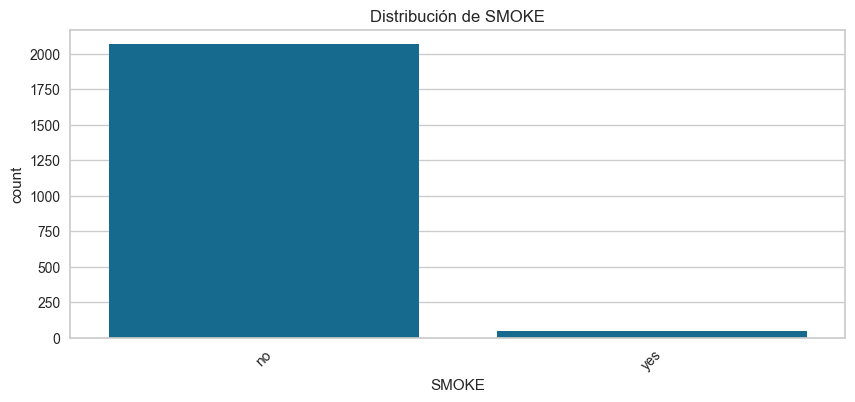

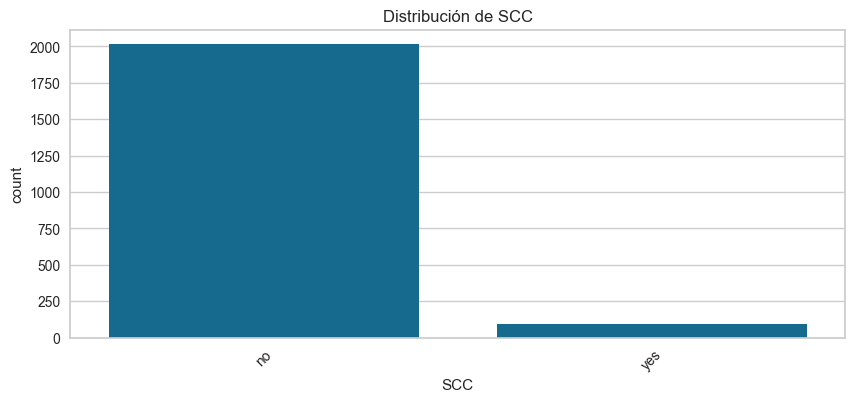

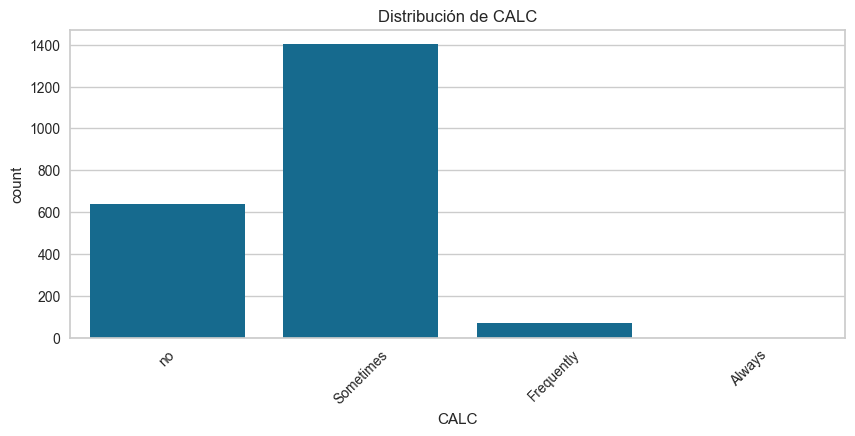

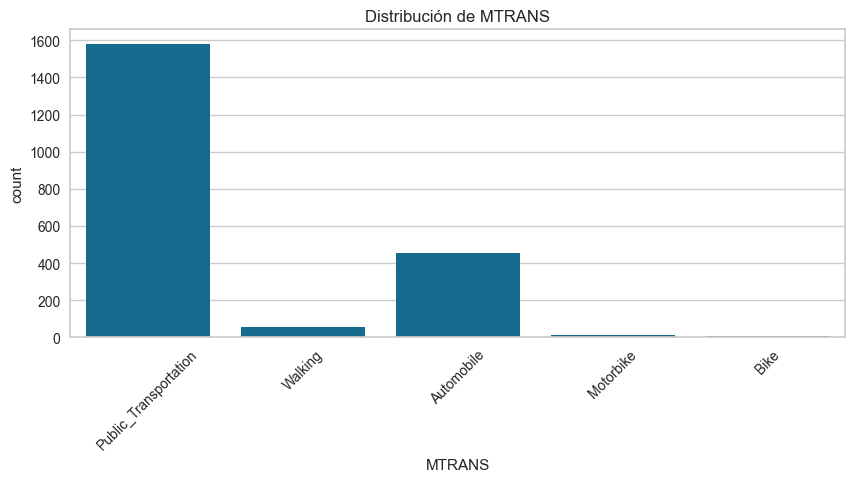

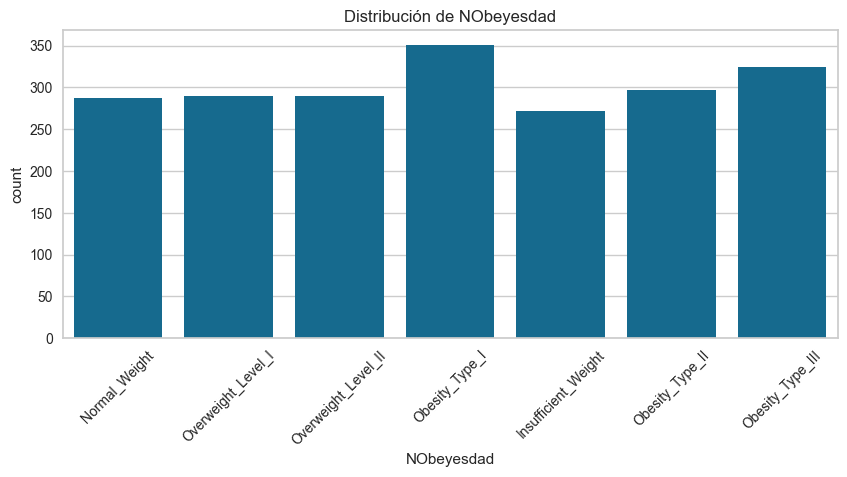

In [41]:
# Bar charts for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

## Preprocessing: Train-Test Split and Normalization

First we need to use labelencoder in order to transform the classificarion variable called NObeyesdad from strings to numbers that the algorithm can understand

In [42]:
le = LabelEncoder()
y = le.fit_transform(df["NObeyesdad"])  # converts the column to integer values
# Display the mapped class
list(zip(le.classes_, le.transform(le.classes_)))

[('Insufficient_Weight', 0),
 ('Normal_Weight', 1),
 ('Obesity_Type_I', 2),
 ('Obesity_Type_II', 3),
 ('Obesity_Type_III', 4),
 ('Overweight_Level_I', 5),
 ('Overweight_Level_II', 6)]

In [43]:
# We use the variables already encoded
x = df.drop("NObeyesdad", axis=1)
x_encoded = pd.get_dummies(x, drop_first=True)
y = le.fit_transform(df["NObeyesdad"])  # already modified with labelencoder()

# Store the array
x = x_encoded.values


## Oversampling


In [44]:
# Creamos una instancia de RandomOverSampler para balancear las clases.
# - random_state=10000: Se establece una semilla para reproducibilidad.
ros = RandomOverSampler(random_state=10000)

# Aplicamos el sobremuestreo para generar nuevas instancias de las clases minoritarias hasta igualar la cantidad de la clase mayoritaria.
x, y = ros.fit_resample(x, y)

# Mostramos la distribución de clases después del sobremuestreo.
print('OverSample train:', sorted(Counter(y).items()))

OverSample train: [(0, 351), (1, 351), (2, 351), (3, 351), (4, 351), (5, 351), (6, 351)]


In [45]:
# min-max normalization
x_max =np.max(x)
x_min =np.min(x)
x = (x - x_min)/(x_max-x_min)

## Modeling

Overfitting

In [46]:
k_fold = ShuffleSplit(n_splits=10, test_size=0.30, random_state=42)

In [47]:
setup = setup(
    data=x,
    target=y,
    session_id=123,
    train_size=0.7
)
# We will get a warning because we transformed the categorical features with get_dummies() function

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(2457, 24)"
4,Transformed data shape,"(2457, 24)"
5,Transformed train set shape,"(1719, 24)"
6,Transformed test set shape,"(738, 24)"
7,Categorical features,23
8,Preprocess,True
9,Imputation type,simple


In [48]:
# Comparing models with cross validation with 10 folds
model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9756,0.9991,0.9756,0.9768,0.9756,0.9715,0.9717,0.4310
gbc,Gradient Boosting Classifier,0.9680,0.0000,0.9680,0.9691,0.9681,0.9627,0.9628,0.3010
rf,Random Forest Classifier,0.9523,0.9968,0.9523,0.9571,0.9527,0.9443,0.9450,0.0550
dt,Decision Tree Classifier,0.9459,0.9685,0.9459,0.9473,0.9459,0.9369,0.9371,0.0190
et,Extra Trees Classifier,0.9343,0.9948,0.9343,0.9398,0.9351,0.9233,0.9240,0.0510
lda,Linear Discriminant Analysis,0.9081,0.0000,0.9081,0.9115,0.9070,0.8927,0.8936,0.0190
knn,K Neighbors Classifier,0.8685,0.9629,0.8685,0.8726,0.8677,0.8466,0.8476,0.0310
lr,Logistic Regression,0.6347,0.0000,0.6347,0.6195,0.6029,0.5738,0.5813,0.0260
svm,SVM - Linear Kernel,0.6329,0.0000,0.6329,0.6458,0.5975,0.5717,0.5843,0.0230
ridge,Ridge Classifier,0.5858,0.0000,0.5858,0.5557,0.5296,0.5167,0.5321,0.0220


Although we are limited to selecting between a regression model and an SVC model, we can look at which models would perform better for our dataset. For the development of this case we will use logistic regression and SVM as well.

In [49]:
model = create_model('lr')

model2 = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6047,0.0000,0.6047,0.5833,0.5641,0.5389,0.5478
1,0.6628,0.0000,0.6628,0.6445,0.6369,0.6064,0.6113
2,0.5814,0.0000,0.5814,0.5492,0.5498,0.5113,0.5170
3,0.6512,0.0000,0.6512,0.6255,0.6184,0.5925,0.5990
4,0.6163,0.0000,0.6163,0.6028,0.5851,0.5520,0.5593
5,0.6744,0.0000,0.6744,0.6746,0.6490,0.6199,0.6282
6,0.6395,0.0000,0.6395,0.6254,0.6117,0.5795,0.5863
7,0.6744,0.0000,0.6744,0.6803,0.6522,0.6204,0.6271
8,0.6221,0.0000,0.6221,0.5941,0.5780,0.5596,0.5691


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6279,0.0000,0.6279,0.5840,0.5888,0.5661,0.5732
1,0.6395,0.0000,0.6395,0.6881,0.6083,0.5792,0.5881
2,0.5058,0.0000,0.5058,0.5886,0.4500,0.4225,0.4602
3,0.6744,0.0000,0.6744,0.6508,0.6459,0.6199,0.6255
4,0.6512,0.0000,0.6512,0.6330,0.6176,0.5930,0.6016
5,0.6628,0.0000,0.6628,0.6735,0.6377,0.6066,0.6169
6,0.6512,0.0000,0.6512,0.6995,0.6044,0.5932,0.6053
7,0.6512,0.0000,0.6512,0.6517,0.6308,0.5933,0.6035
8,0.6163,0.0000,0.6163,0.6113,0.5591,0.5521,0.5695


In [50]:
print(model)
print (model2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [51]:
# Displays the hyperparameters of the model
print(model.get_params())
print(model2.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 123, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.001, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 123, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


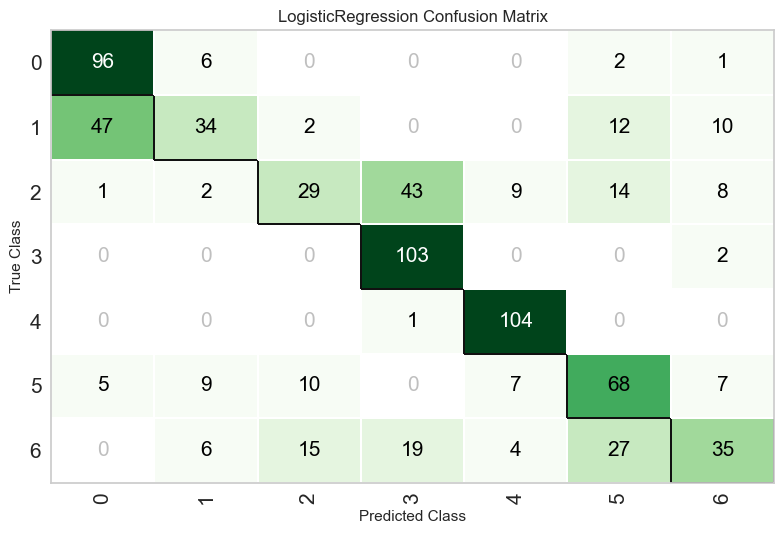

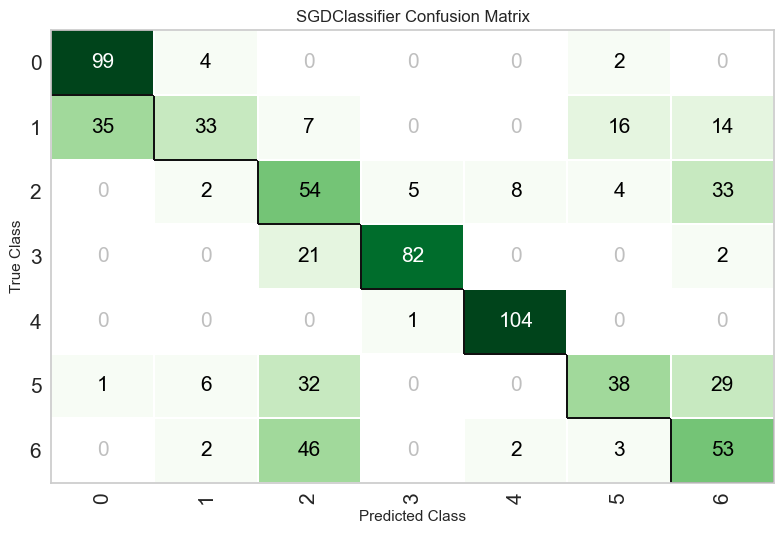

In [52]:
# We generate the confusion matrix of the model
plot_model(model, plot='confusion_matrix')
plot_model(model2, plot='confusion_matrix')

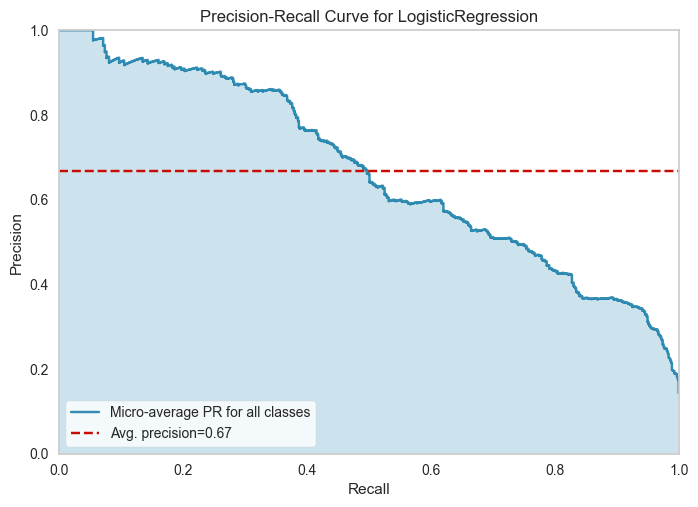

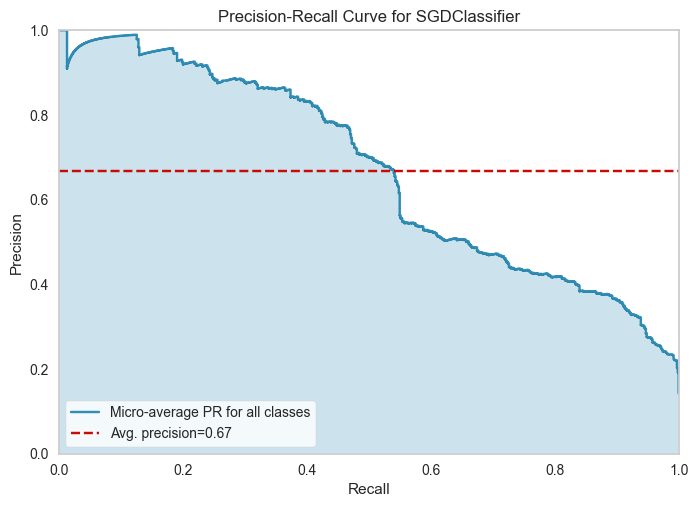

In [53]:
# Generating the precision-recall curve for the logistic regression
plot_model(model, plot='pr')
plot_model(model2, plot='pr')

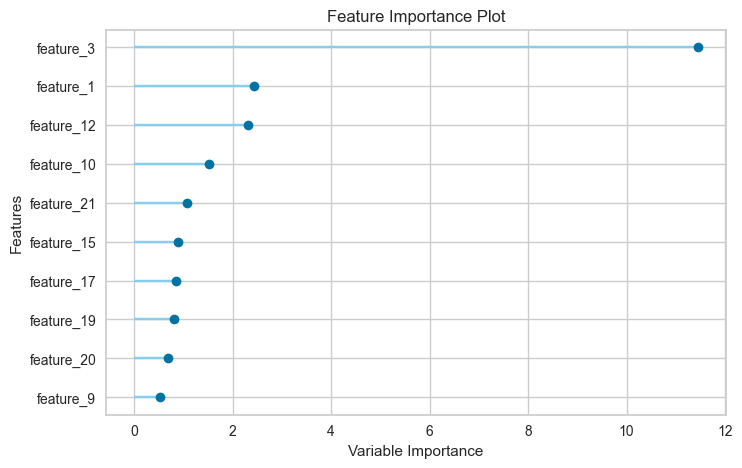

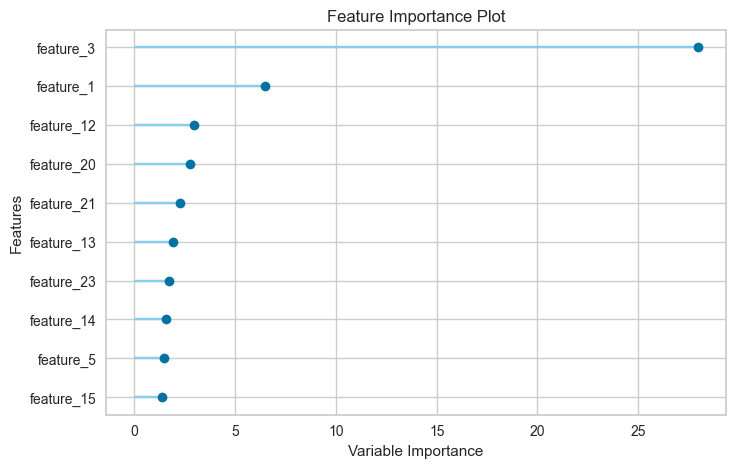

In [54]:
# We generate a feature importance plot of the trained model.
plot_model(model, plot='feature')
plot_model(model2, plot='feature')

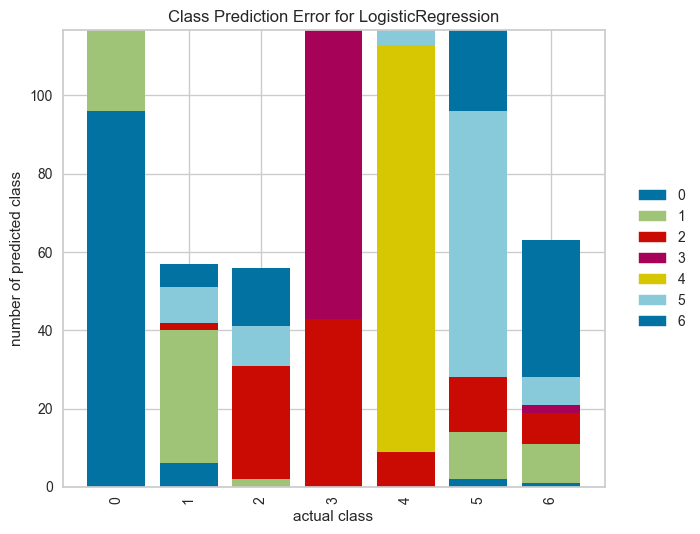

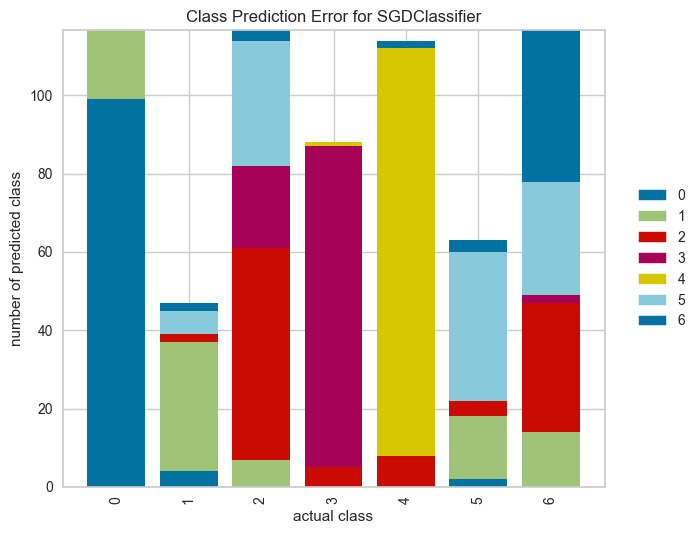

In [55]:
# Generamos el gráfico de error del modelo entrenado.
plot_model(model, plot='error')
plot_model(model2, plot='error')

In [56]:
# Giving all the information about both models (model -> logistic regression; model2 -> SVM)
evaluate_model(model)
evaluate_model(model2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…